In [47]:
import pandas as pd
import numpy as np


In [48]:
df= pd.read_csv('customer_churn.csv')
df.shape

(7043, 21)

In [49]:
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
727,6786-OBWQR,Female,0,Yes,Yes,5,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.85,356.1,No
1862,0523-VNGTF,Female,1,No,No,52,No,No phone service,DSL,No,...,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,50.50,2566.3,No
4868,2568-OIADY,Female,0,Yes,No,37,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.50,3762,Yes
1012,7426-RHZGU,Male,0,No,No,9,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.90,827.45,No
4952,7379-FNIUJ,Male,0,No,No,2,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,100.20,198.5,No


In [50]:
# Data cleaning
# Drop customerID (not useful for prediction)
df = df.drop('customerID', axis=1)

# Convert TotalCharges to numeric (handle empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill any NaN values in TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

print("Cleaned data shape:", df.shape)
print("Data types:")
print(df.dtypes)

Cleaned data shape: (7043, 20)
Data types:
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


C:\Users\adity\AppData\Local\Temp\ipykernel_9568\2284166768.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [51]:
# List of categorical columns to encode
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'PaymentMethod'
]

# One-Hot Encode them
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode the target (Churn) as 0/1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [52]:
df.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,Month-to-month,29.85,29.85,0,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,One year,56.95,1889.50,0,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,0,2,Month-to-month,53.85,108.15,1,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,0,45,One year,42.30,1840.75,0,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,0,2,Month-to-month,70.70,151.65,1,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   Contract                               7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   gender_Male                            7043 non-null   bool   
 7   Partner_Yes                            7043 non-null   bool   
 8   Dependents_Yes                         7043 non-null   bool   
 9   PhoneService_Yes                       7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [53]:
# Check unique values in Contract column
print("Number of unique values:", df['Contract'].nunique())
print("\nValue counts:")
df['Contract'].value_counts()

# Best for Contract
df['Contract'] = df['Contract'].map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})

Number of unique values: 3

Value counts:


In [54]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [55]:


param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, (len(y_train)-sum(y_train))/sum(y_train)]  # Helps imbalance ~2.8
}

grid = GridSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'),
                    param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)
model = grid.best_estimator_

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'scale_pos_weight': 1, 'subsample': 0.8}


In [56]:

# Train XGBoost
model = XGBClassifier(
    n_estimators=500,
    max_depth=3,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    random_state=42,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))

Accuracy: 0.8019872249822569
AUC Score: 0.8472254514454003
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [60]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)
rf_y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("AUC Score:", roc_auc_score(y_test, rf_y_pred_proba))
print(classification_report(y_test, rf_y_pred))

Random Forest Results:
Accuracy: 0.8055358410220014
AUC Score: 0.8424319925598698
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



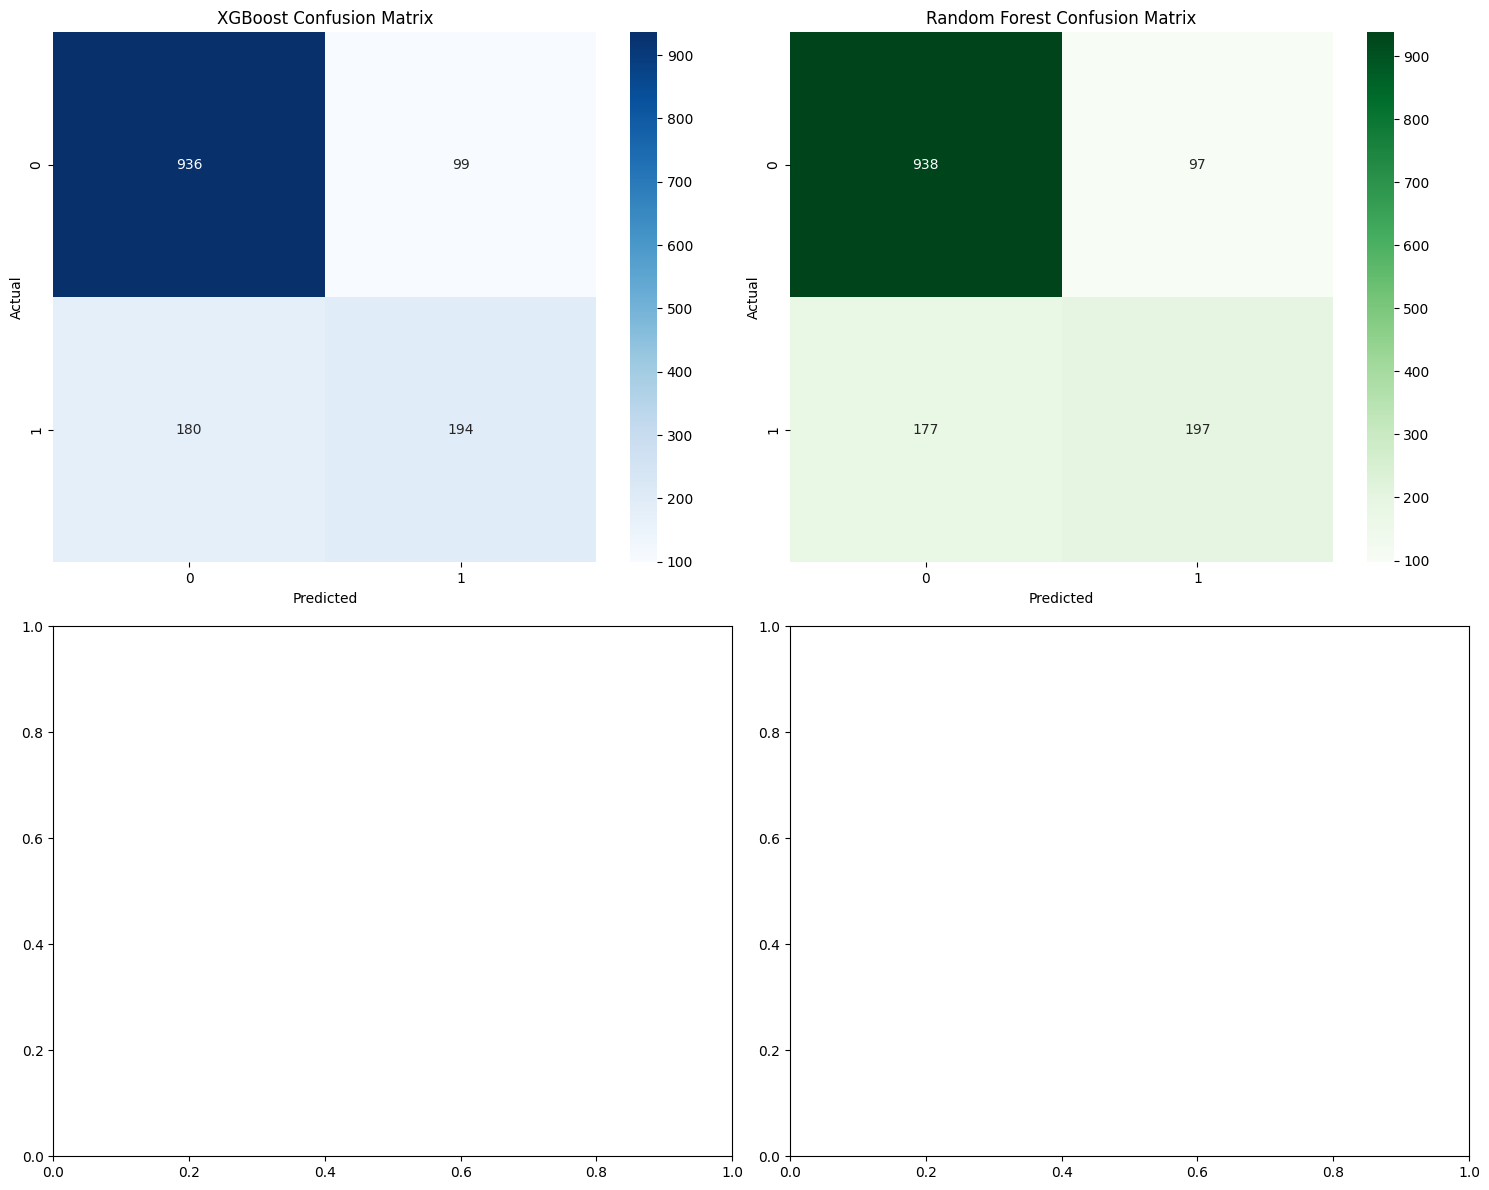

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('XGBoost Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# 2. Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf_y_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title('Random Forest Confusion Matrix')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')


plt.tight_layout()
plt.show()

In [57]:
df.sample(2)

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1413,0,65,2,94.55,6078.75,0,True,True,True,True,...,False,True,False,False,False,False,False,True,False,False
506,0,11,0,78.00,851.80,0,True,False,True,True,...,False,False,False,False,False,False,True,False,False,True


why two column used for same purpose? <br>

Original Value,OnlineSecurity_No internet service,OnlineSecurity_Yes,(Implied Baseline)<br>
"""No internet service""",True,False,→ No internet<br>
"""Yes""",False,True,→ Has OnlineSecurity<br>
"""No""",False,False,"→ Has internet, but no add-on (baseline)"

<h5>Similary </h5>
You see the exact same thing for:<br>

OnlineBackup_No internet service + OnlineBackup_Yes <br>
DeviceProtection_No internet service + DeviceProtection_Yes <br>
TechSupport_No internet service + TechSupport_Yes <br>
StreamingTV_No internet service + StreamingTV_Yes<br> 
StreamingMovies_No internet service + StreamingMovies_Yes<br>

<h4>Why Bool (True/False) Is Actually Better Than int 0/1 Here</h4>

Memory efficient: Boolean columns use only 1 byte per value instead of 8 bytes for int64.<br>
Clearer meaning: gender_Male = True is more readable than gender_Male = 1.<br>

also when you use 0,1,2 it means use for priority like good <very good < excellent (0<1<2 )
but here in binary operation or non comparision relationship so use boolean 